In [1]:
import numpy as np 
import pandas as pd 

from Utils.Convex_Hull import plot_portfolio_convex_hull

import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

- ETFs' Price Data

In [2]:
dict = {
    'XLB' : 'Material',
    'XLE' : 'Energy',
    'XLF' : 'Financial',
    'XLI' : 'Industrial',
    'XLK' : 'Technology',
    'XLP' : 'Consumer Staples',
    'XLU' : 'Utility',
    'XLV' : 'Health Care',
    'XLY' : 'Consumer Discretionary',
}

dict

{'XLB': 'Material',
 'XLE': 'Energy',
 'XLF': 'Financial',
 'XLI': 'Industrial',
 'XLK': 'Technology',
 'XLP': 'Consumer Staples',
 'XLU': 'Utility',
 'XLV': 'Health Care',
 'XLY': 'Consumer Discretionary'}

# ETFs' Price Data - Return Performance, Volatility Performance, Convex Hull

In [3]:
df_ETFs_Price = pd.read_excel(r'./data/ETFs Daily Price df.xlsx',index_col='DATE')
df_ETFs_Price

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
DATE,,,,,,,,,
2000-01-01,13.922743,15.406697,11.868655,17.975063,38.608086,13.613623,12.359402,21.526585,20.757641
2000-02-01,12.523933,14.754468,10.598163,16.983339,42.664566,12.020637,10.857274,20.119024,19.601120
2000-03-01,13.754876,16.534883,12.487820,19.307693,46.243813,12.432620,11.954177,21.928740,22.331448
2000-04-01,13.329492,16.342661,12.654705,19.627031,41.996437,13.133813,12.831629,21.671804,21.909103
2000-05-01,12.908855,18.261688,12.937169,19.544205,37.629765,14.070637,12.803472,21.090918,20.726446
...,...,...,...,...,...,...,...,...,...
2022-05-01,84.958115,85.302902,35.097301,93.836861,139.740952,73.437263,73.243813,131.151352,153.861313
2022-06-01,72.682983,69.954254,31.119539,86.543945,126.478241,71.179016,69.105179,127.193901,136.876221
2022-07-01,77.690582,77.574211,33.533596,95.184372,143.864792,74.008575,73.452499,131.874344,162.489792


In [4]:
df_ETFs_Price.columns = df_ETFs_Price.columns.to_series().map(dict)
df_ETFs_Price

,Material,Energy,Financial,Industrial,Technology,Consumer Staples,Utility,Health Care,Consumer Discretionary
DATE,,,,,,,,,
2000-01-01,13.922743,15.406697,11.868655,17.975063,38.608086,13.613623,12.359402,21.526585,20.757641
2000-02-01,12.523933,14.754468,10.598163,16.983339,42.664566,12.020637,10.857274,20.119024,19.601120
2000-03-01,13.754876,16.534883,12.487820,19.307693,46.243813,12.432620,11.954177,21.928740,22.331448
2000-04-01,13.329492,16.342661,12.654705,19.627031,41.996437,13.133813,12.831629,21.671804,21.909103
2000-05-01,12.908855,18.261688,12.937169,19.544205,37.629765,14.070637,12.803472,21.090918,20.726446
...,...,...,...,...,...,...,...,...,...
2022-05-01,84.958115,85.302902,35.097301,93.836861,139.740952,73.437263,73.243813,131.151352,153.861313
2022-06-01,72.682983,69.954254,31.119539,86.543945,126.478241,71.179016,69.105179,127.193901,136.876221
2022-07-01,77.690582,77.574211,33.533596,95.184372,143.864792,74.008575,73.452499,131.874344,162.489792


- Return Data

In [5]:
df_ETFs_Return = df_ETFs_Price.pct_change()[1:]
df_ETFs_Return

,Material,Energy,Financial,Industrial,Technology,Consumer Staples,Utility,Health Care,Consumer Discretionary
DATE,,,,,,,,,
2000-02-01,-0.100469,-0.042334,-0.107046,-0.055172,0.105068,-0.117014,-0.121537,-0.065387,-0.055715
2000-03-01,0.098287,0.120670,0.178300,0.136861,0.083893,0.034273,0.101029,0.089950,0.139294
2000-04-01,-0.030926,-0.011625,0.013364,0.016539,-0.091847,0.056399,0.073401,-0.011717,-0.018913
2000-05-01,-0.031557,0.117424,0.022321,-0.004220,-0.103977,0.071329,-0.002194,-0.026804,-0.053980
2000-06-01,-0.089790,-0.059564,-0.051778,-0.041313,0.099556,0.054177,-0.041232,0.002118,-0.055907
...,...,...,...,...,...,...,...,...,...
2022-05-01,0.011761,0.160346,0.027818,-0.004625,-0.006859,-0.040829,0.043082,0.014890,-0.051203
2022-06-01,-0.144485,-0.179931,-0.113335,-0.077719,-0.094909,-0.030751,-0.056505,-0.030175,-0.110392
2022-07-01,0.068896,0.108928,0.077574,0.099839,0.137467,0.039753,0.062909,0.036798,0.187129


- Asset Returns Performance

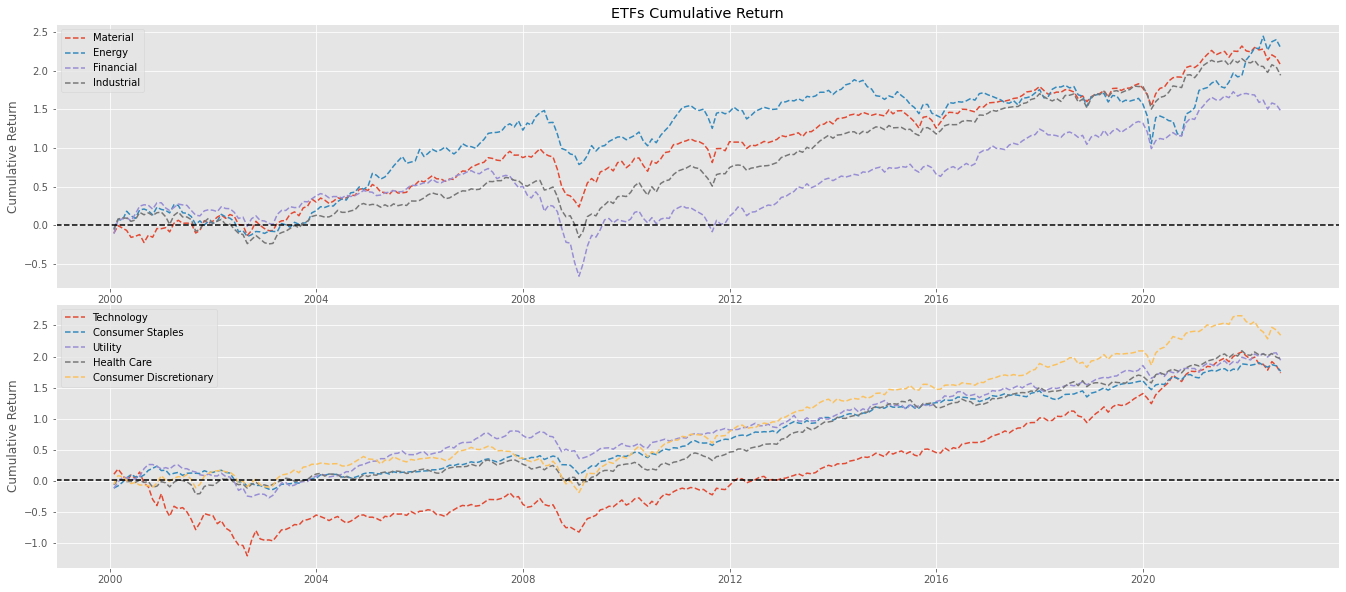

In [6]:
plt.subplots(figsize=(23,10))
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=3,colspan=1)
ax1.set_title("ETFs Cumulative Return")
for i in range(df_ETFs_Return.shape[1]-5):
    ax1.plot(df_ETFs_Return.index , df_ETFs_Return[df_ETFs_Return.columns[i]].cumsum() ,label=str(df_ETFs_Return.columns[i]),linestyle='--')
ax1.axhline(0.01 , linestyle='--' , color='black')
ax1.set_ylabel('Cumulative Return')
ax1.legend()

ax2 = plt.subplot2grid((6,1),(3,0),rowspan=3,colspan=1)
for i in range(df_ETFs_Return.shape[1]-5,df_ETFs_Return.shape[1]):
    ax2.plot(df_ETFs_Return.index , df_ETFs_Return[df_ETFs_Return.columns[i]].cumsum() ,label=str(df_ETFs_Return.columns[i]),linestyle='--')
ax2.set_ylabel('Cumulative Return')
ax2.axhline(0.01 , linestyle='--' , color='black')
ax2.legend()
plt.show()

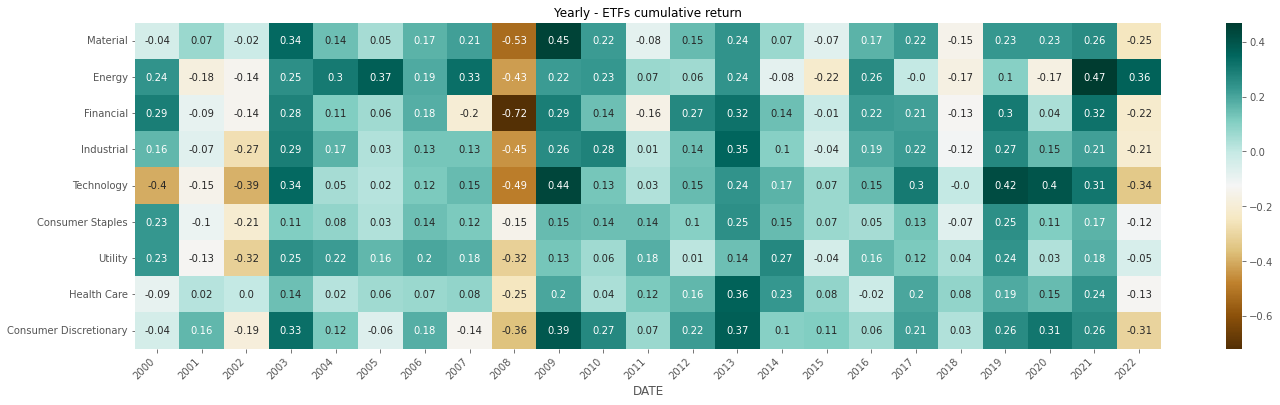

In [7]:
year_etf_returns = df_ETFs_Return.to_period('Y').groupby('DATE')[df_ETFs_Return.columns].agg('sum')
year_etf_returns = year_etf_returns.round(decimals=2)

fig, ax = plt.subplots(figsize=(23,6))
plt.title('Yearly - ETFs cumulative return',fontsize=12)
sns.heatmap(year_etf_returns.T , annot=True, fmt="", cmap='BrBG')
plt.xticks(rotation=45, ha='right')
plt.show()

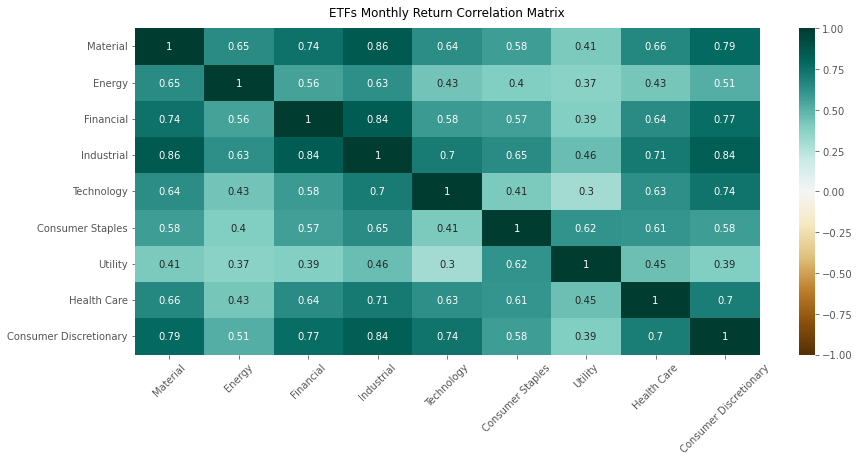

In [8]:
plt.figure(figsize=(14, 6))
corr = df_ETFs_Return.corr()
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True , cmap='BrBG' )
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('ETFs Monthly Return Correlation Matrix', fontdict={'fontsize':12}, pad=12) ;
plt.xticks(rotation=45)
plt.show()

- Assets Convex Hull

,Unbiased_Std,Expected_Returns,Sharp-ratio
Consumer Staples,0.12,0.08,0.63
Health Care,0.14,0.09,0.60
Utility,0.15,0.09,0.55
Consumer Discretionary,0.19,0.10,0.54
Industrial,0.19,0.09,0.45
Material,0.21,0.09,0.44
Energy,0.26,0.10,0.39
Technology,0.23,0.08,0.33
Financial,0.22,0.07,0.30


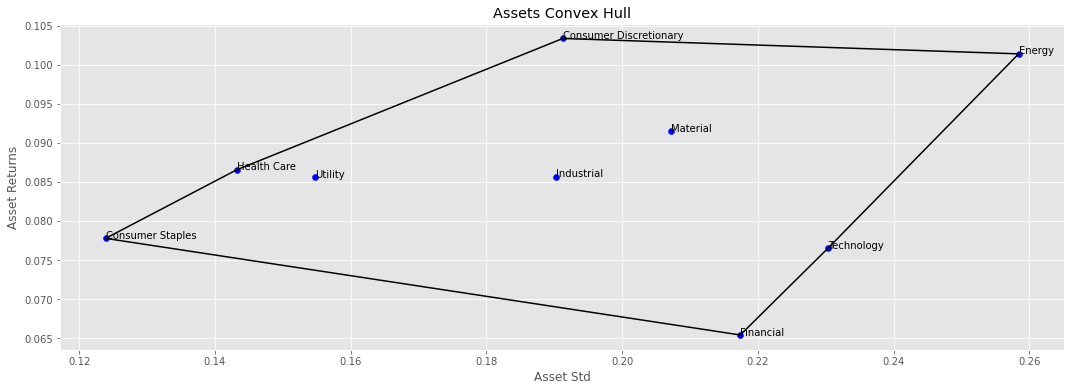

In [9]:
Expected_Return   = df_ETFs_Price.pct_change().mean() * 12
Unbiased_Std      = df_ETFs_Price.pct_change().std() * np.sqrt(12)

Cov_Matrix = df_ETFs_Price.pct_change().cov()
u          = Expected_Return.values
sigma      = Unbiased_Std.values 


CovexHull_DF = pd.DataFrame({
    "Unbiased_Std" : Unbiased_Std ,
    "Expected_Returns" : Expected_Return ,
    })

plot_portfolio_convex_hull(CovexHull_DF)
CovexHull_DF['Sharp-ratio'] = CovexHull_DF['Expected_Returns'] / CovexHull_DF['Unbiased_Std']
CovexHull_DF.sort_values(by='Sharp-ratio',ascending=False).round(decimals=2)

# Macro Data - Factor Correlation, Macro Trend

In [10]:
df_macro_factor = pd.read_excel(r'data/ETFs Sector Rotation Macro Factor df.xlsx',index_col='DATE')
df_macro_factor

,CPI YoY,Core CPI YoY,PPI index(All Commodity),2-Year Treasury Yield,10-Year Treasury Yield,10-2 Year Treasury Yield Spread,Mkt-RF,SMB,HML
DATE,,,,,,,,,
2000-01-01,2.79296,2.10706,128.300,6.445,6.680,0.235,-4.74,5.79,-1.91
2000-02-01,3.21797,2.16401,129.800,6.630,6.560,-0.070,2.45,21.42,-9.70
2000-03-01,3.76214,2.44735,130.800,6.520,6.260,-0.260,5.20,-17.23,8.17
2000-04-01,3.01386,2.26886,130.700,6.380,5.990,-0.390,-6.40,-6.68,7.26
2000-05-01,3.13253,2.37960,131.600,6.825,6.455,-0.370,-4.42,-6.09,4.81
...,...,...,...,...,...,...,...,...,...
2022-04-01,8.22414,6.13369,265.310,2.520,2.800,0.280,-9.46,-1.41,6.19
2022-05-01,8.51641,6.01128,273.251,2.620,2.890,0.270,-0.34,-1.85,8.41
2022-06-01,8.99522,5.91245,280.204,3.060,3.130,0.070,-8.43,2.09,-5.97


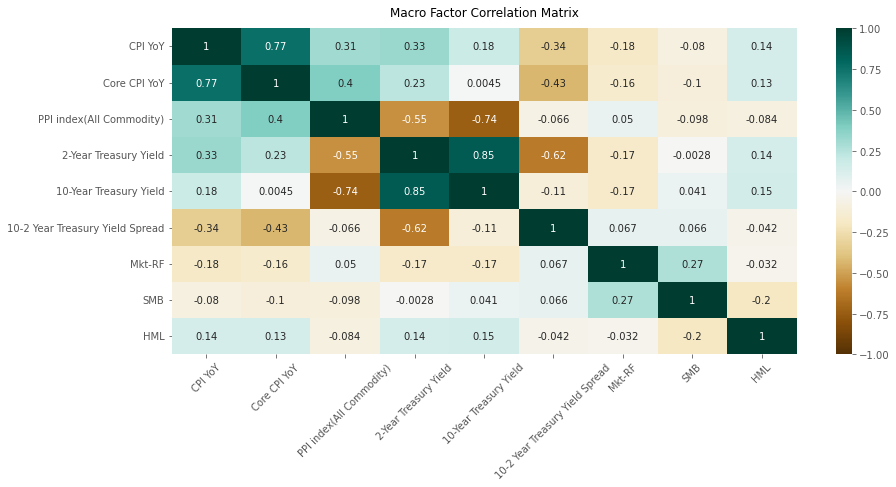

In [11]:
plt.figure(figsize=(14, 6))
corr = df_macro_factor.corr()
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True , cmap='BrBG' )
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Macro Factor Correlation Matrix', fontdict={'fontsize':12}, pad=12) ;
plt.xticks(rotation=45)
plt.show()

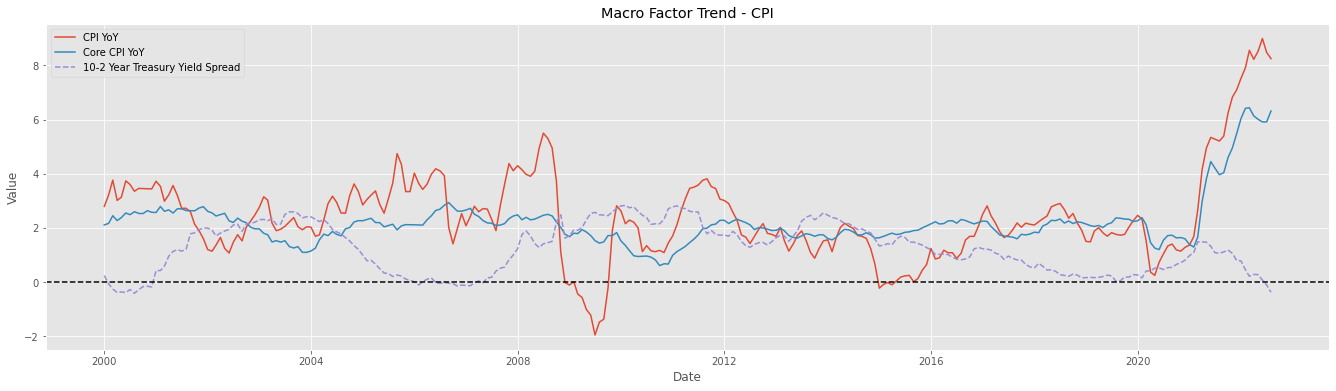

In [12]:
fig,ax = plt.subplots(figsize=(23,6))
ax.set_title('Macro Factor Trend - CPI')
ax.plot(df_macro_factor.index, df_macro_factor['CPI YoY'], label='CPI YoY')
ax.plot(df_macro_factor.index, df_macro_factor['Core CPI YoY'], label='Core CPI YoY')
ax.plot(df_macro_factor.index, df_macro_factor['10-2 Year Treasury Yield Spread'], label='10-2 Year Treasury Yield Spread',linestyle='--')
ax.axhline(0,color='black',linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.show()